In [86]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import pymysql
import warnings as w
w.filterwarnings("ignore")
plt.style.use("ggplot")
sns.set_style("whitegrid")

In [87]:
# Fecthing data from Mysql 

connection = pymysql.connect(
                             host = "localhost",
                             port = 3306,
                             user = "root",
                             password = "Areeb@123",
                             database = "loandb"
                            )

query =  "select * from loan_data "


In [88]:
df = pd.read_sql( query, connection)

connection.close()

In [89]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [91]:
# dropping the loan id column 

df.drop(columns = "Loan_ID" , inplace = True)

In [92]:
# let’s have a look if the data has missing values or no

df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [93]:
# Summary Statistics

df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [94]:
df.describe( include = "object")

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,601,611,599,614,582,614,614
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,489,398,345,480,500,233,422


In [95]:
# Fill missing values in categorical columns with mode

df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

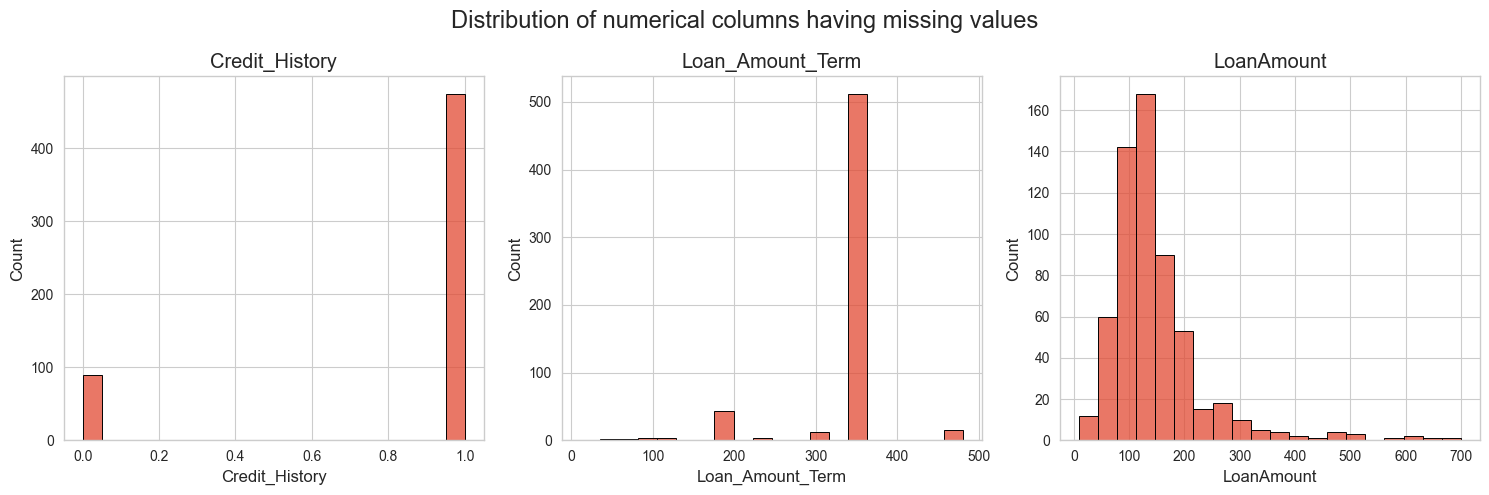

In [96]:
columns = ['Credit_History', 'Loan_Amount_Term', 'LoanAmount']

plt.figure( figsize = (15,5))
for index, i in enumerate(columns, start = 1):
    plt.subplot(1,3,index)
    sns.histplot( df[i], edgecolor = "black", linewidth = 0.7 , bins = 20)
    plt.title(i)

plt.suptitle( "Distribution of numerical columns having missing values", size = 17)
plt.tight_layout()
plt.show()
    

1 ) We can fill in the missing values of the loan amount column with the median value. The median is an appropriate measure to fill in missing values   when dealing with skewed distributions or when outliers are present in the data

In [97]:
# Fill missing values in LoanAmount with the median
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

2 ) We can fill in the missing values of the loan amount term column with the mode value of the column. Since the term of the loan amount is a discrete value, the mode is an appropriate metric to use

In [98]:
# Fill missing values in Loan_Amount_Term with the mode
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)

3 ) We can fill in the missing values of the credit history column with the mode value. Since credit history is a binary variable (0 or 1), the mode represents the most common value and is an appropriate choice for filling in missing values.

In [99]:
# Fill missing values in Credit_History with the mode
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

## Exploratory Data Analysis

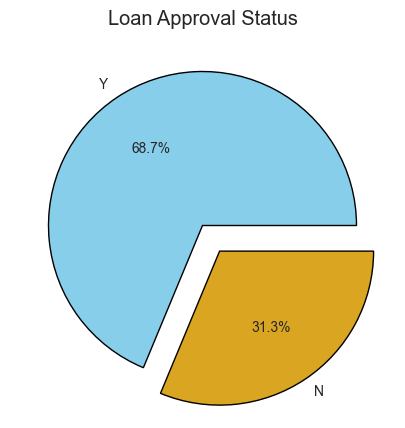

In [100]:
# Now let’s have a look at the distribution of the loan status column

values = df["Loan_Status"].value_counts()

plt.figure( figsize = (15,5) )
plt.pie( values, labels = values.index, autopct = "%1.1f%%", colors = ["skyblue", "goldenrod"],
         wedgeprops = {"edgecolor":"black","linewidth":1},
         explode = [0.0, 0.2])
                                                                                                                            
                                                                                                                    
                                                                                                                                
plt.title("Loan Approval Status")
plt.show()

In [101]:
values

Loan_Status
Y    422
N    192
Name: count, dtype: int64

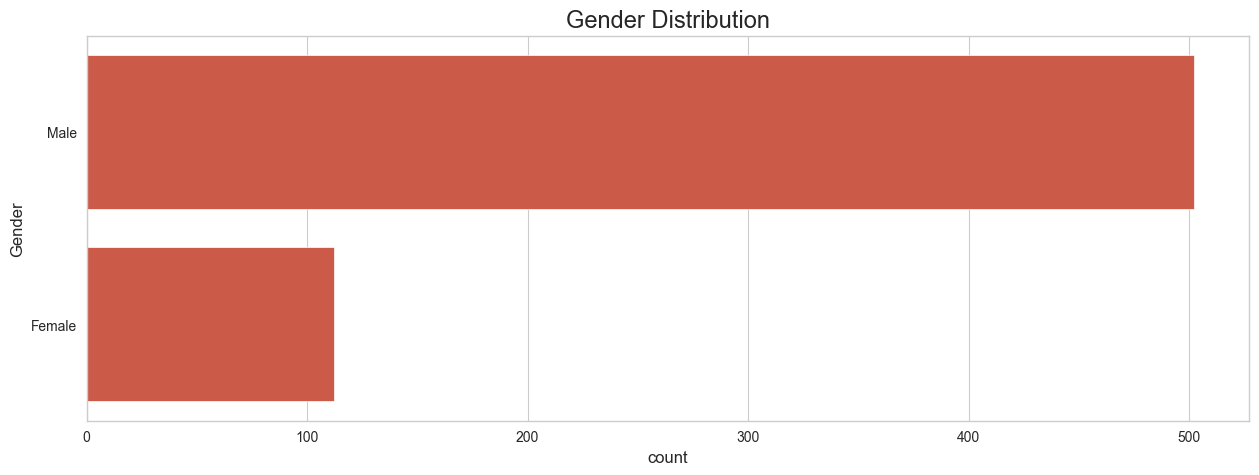

In [102]:
# Now let’s have a look at the distribution of the gender column

plt.figure( figsize = (15,5))

sns.countplot( df["Gender"] )

plt.title('Gender Distribution', size = 17)
plt.show()

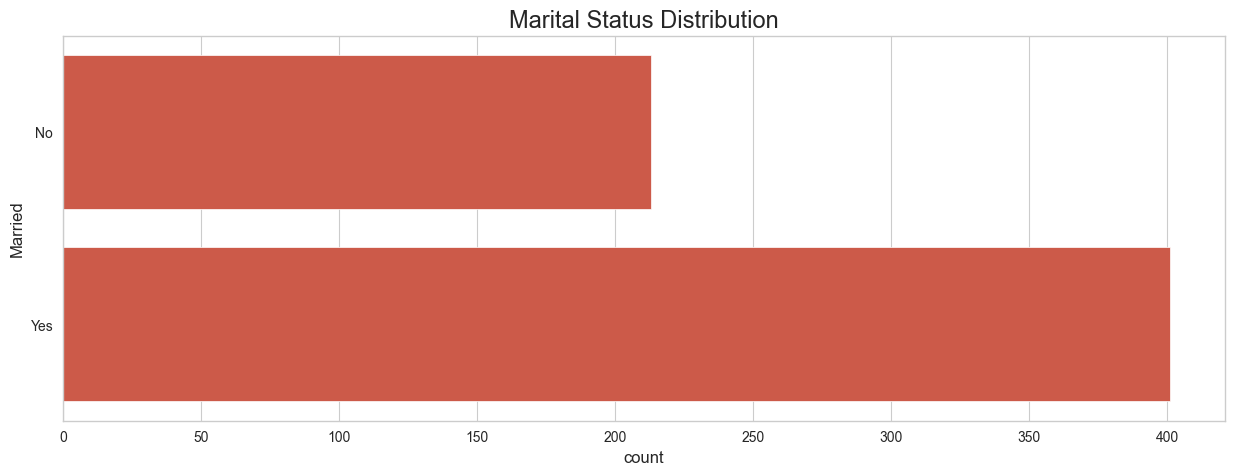

In [103]:
# let’s have a look at the distribution of the martial status column

plt.figure( figsize = (15,5))

sns.countplot( df["Married"] )

plt.title('Marital Status Distribution', size = 17)
plt.show()

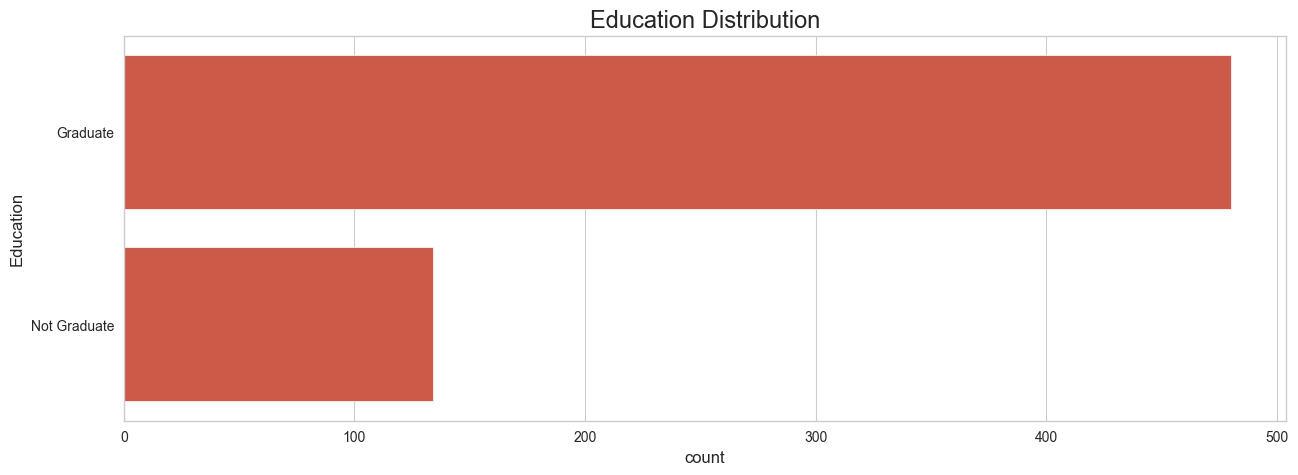

In [104]:
# Now let’s have a look at the distribution of the education column

plt.figure( figsize = (15,5))

sns.countplot( df["Education"] )

plt.title('Education Distribution', size = 17)
plt.show()

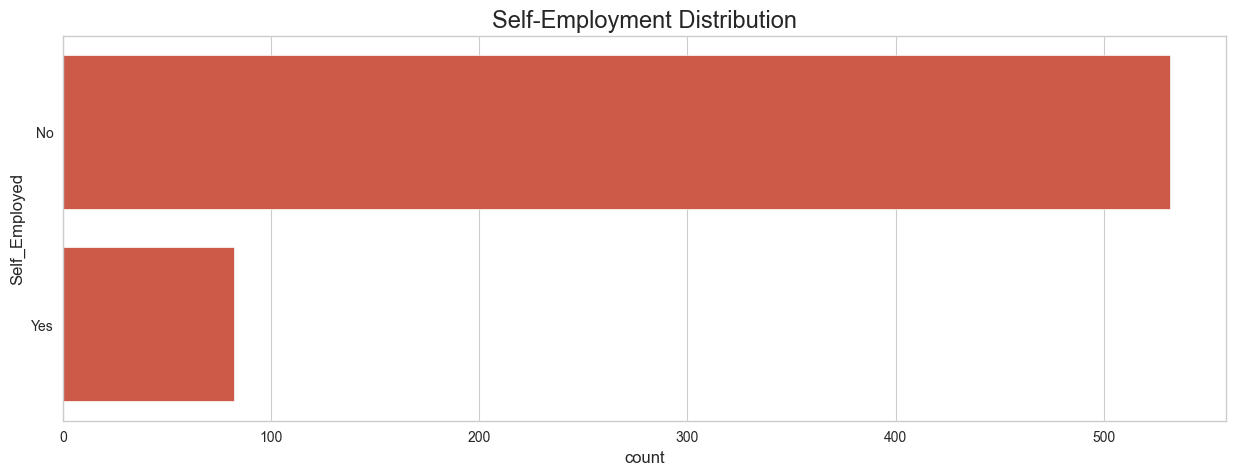

In [105]:
# Now let’s have a look at the distribution of the self-employment column

plt.figure( figsize = (15,5))

sns.countplot( df["Self_Employed"] )

plt.title('Self-Employment Distribution', size = 17)
plt.show()

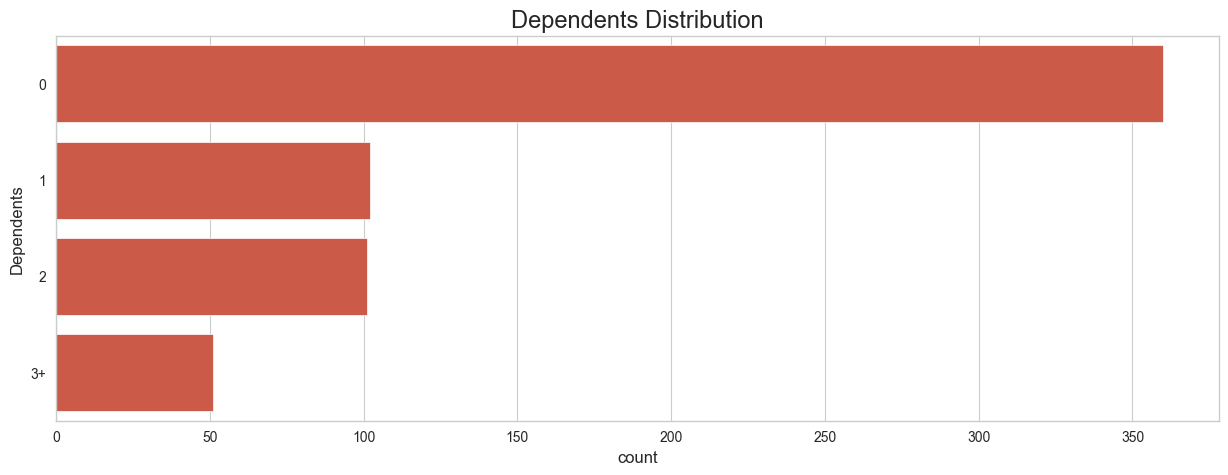

In [110]:
# Now let’s have a look at the distribution of Dependents column

plt.figure( figsize = (15,5))

sns.countplot( df["Dependents"] )

plt.title('Dependents Distribution', size = 17)
plt.show()

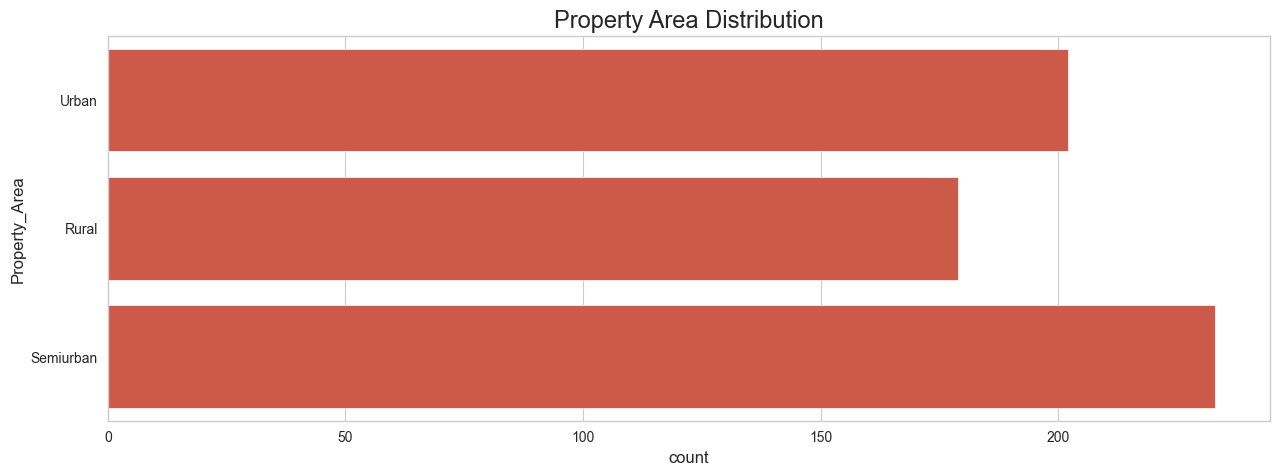

In [108]:
# Now let’s have a look at the distribution of Property Area column

plt.figure( figsize = (15,5))

sns.countplot( df["Property_Area"] )

plt.title('Property Area Distribution', size = 17)
plt.show()

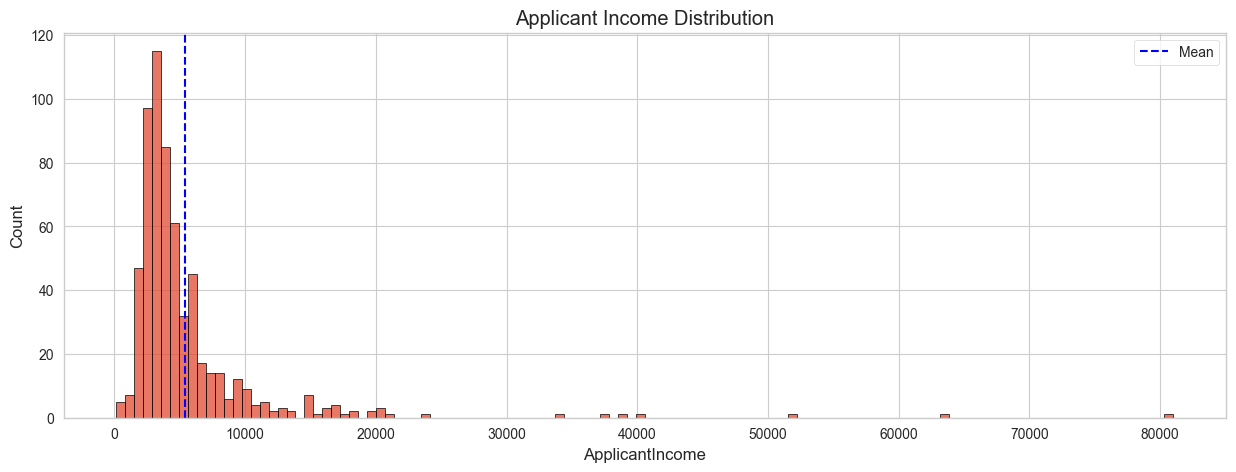

In [21]:
# Now let’s have a look at the distribution of the Applicant Income column

plt.figure(figsize = (15,5))

sns.histplot( df["ApplicantIncome"], edgecolor = "black", linewidth = 0.5)
plt.axvline( df["ApplicantIncome"].mean() , linestyle = "--" , color = "blue" , label = "Mean")

plt.legend()
plt.title("Applicant Income Distribution")
plt.show()

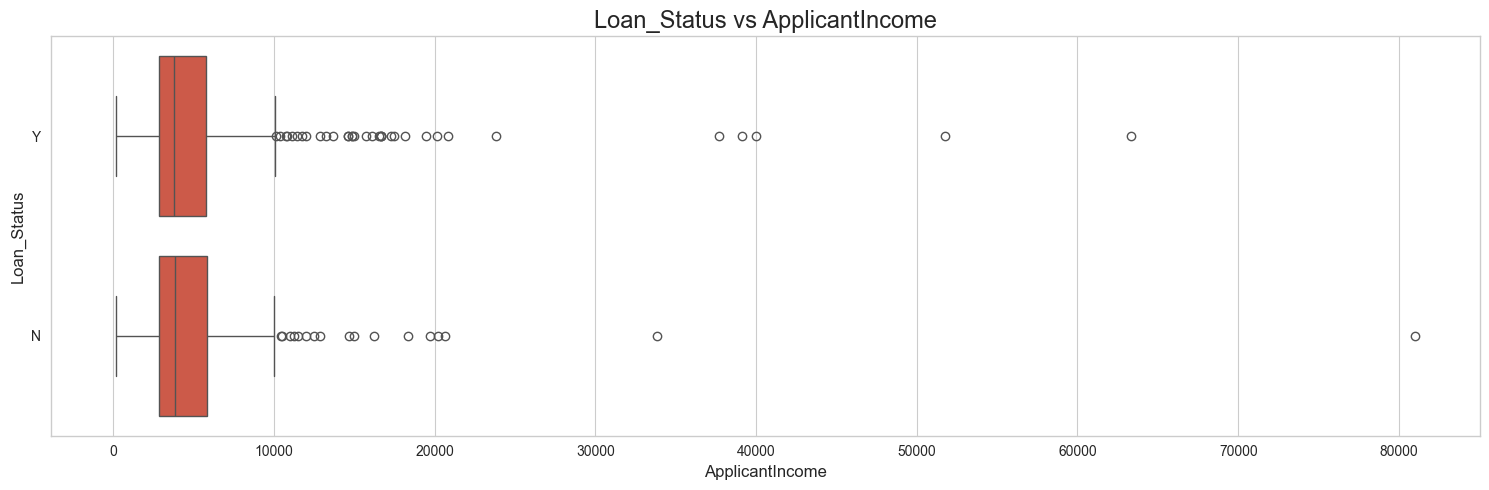

In [22]:
# Now let’s have a look at the relationship between the income of the loan applicant and the loan status

plt.figure( figsize = (15,5))

sns.boxplot( data = df , y = "Loan_Status" , x = "ApplicantIncome" )

plt.title("Loan_Status vs ApplicantIncome", size = 17)
plt.tight_layout()
plt.show()

The “ApplicantIncome” column contains outliers which need to be removed before moving further. Here’s how to remove the outliers

In [23]:
# Calculate the IQR
Q1 = df['ApplicantIncome'].quantile(0.25)
Q3 = df['ApplicantIncome'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['ApplicantIncome'] >= lower_bound) & (df['ApplicantIncome'] <= upper_bound)]

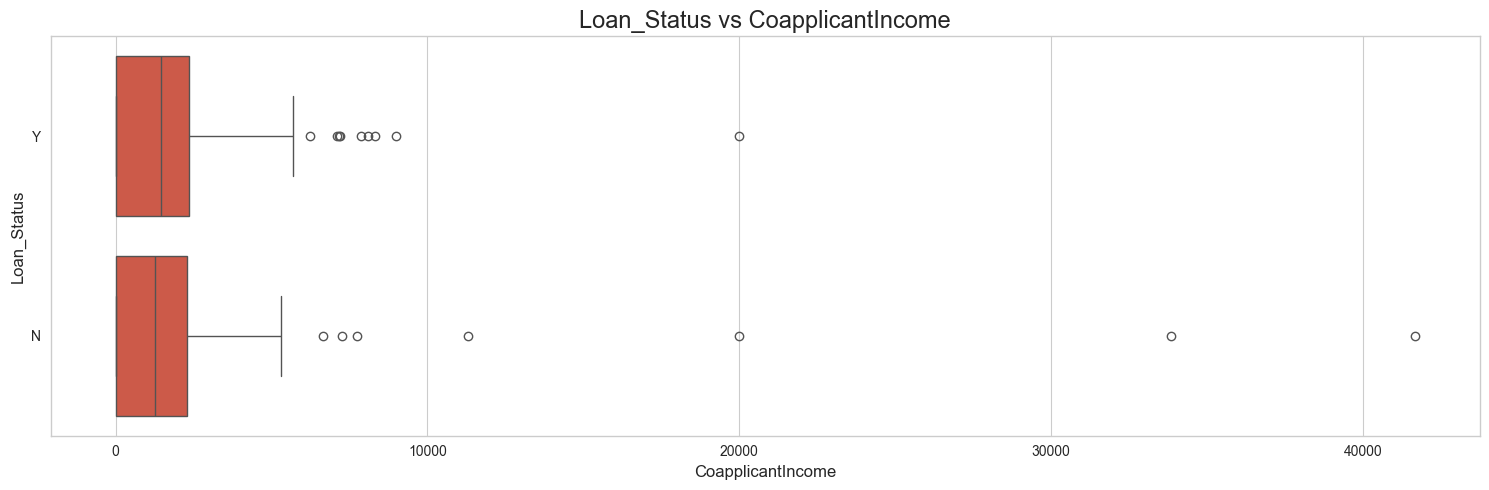

In [24]:
# Now let’s have a look at the relationship between the income of the loan co-applicant and the loan status

plt.figure( figsize = (15,5))

sns.boxplot( data = df , y = "Loan_Status" , x = "CoapplicantIncome" )

plt.title("Loan_Status vs CoapplicantIncome", size = 17)
plt.tight_layout()
plt.show()

In [25]:
# The income of the loan co-applicant also contains outliers. Let’s remove the outliers from this column as well

# Calculate the IQR
Q1 = df['CoapplicantIncome'].quantile(0.25)
Q3 = df['CoapplicantIncome'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['CoapplicantIncome'] >= lower_bound) & (df['CoapplicantIncome'] <= upper_bound)]

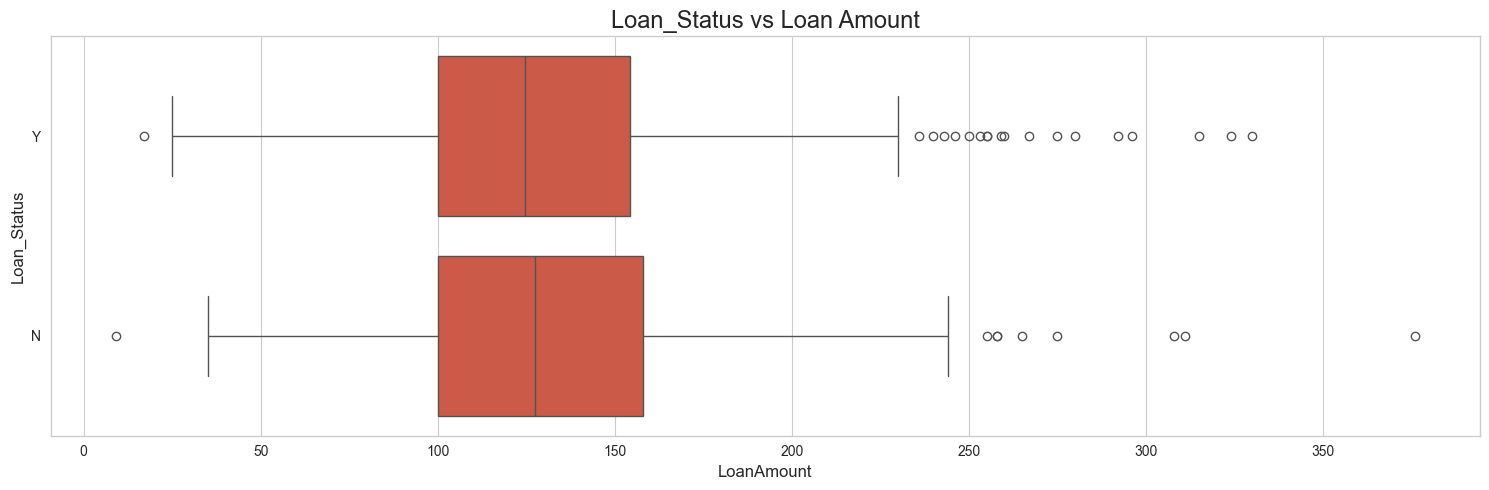

In [26]:
# Now let’s have a look at the relationship between the loan amount and the loan status

plt.figure( figsize = (15,5))

sns.boxplot( data = df , y = "Loan_Status" , x = "LoanAmount" )

plt.title("Loan_Status vs Loan Amount", size = 17)
plt.tight_layout()
plt.show()

In [27]:
df.groupby("Loan_Status")["Credit_History"].count().reset_index()

,Loan_Status,Credit_History
0,N,168
1,Y,380


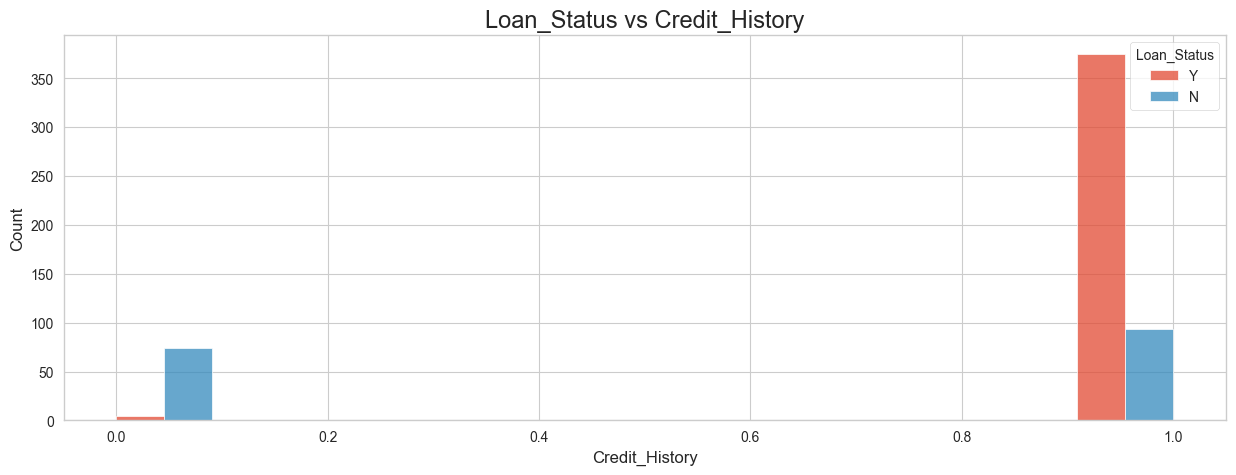

In [28]:
# Now let’s have a look at the relationship between credit history and loan status

plt.figure(figsize=(15, 5))

sns.histplot(data=df, x='Credit_History', hue='Loan_Status', multiple ='dodge')

plt.title('Loan_Status vs Credit_History', size = 17)
plt.show()

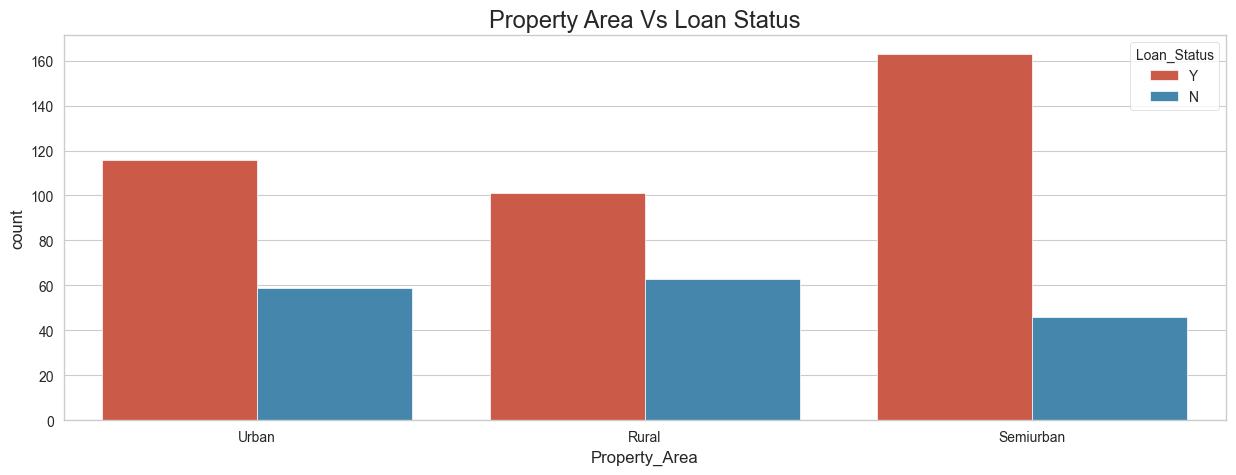

In [29]:
# Now let’s have a look at the relationship between the property area and the loan status

plt.figure( figsize = (15,5))

sns.countplot( x = df["Property_Area"], hue = df["Loan_Status"])

plt.title( "Property Area Vs Loan Status", size = 17 )
plt.show()

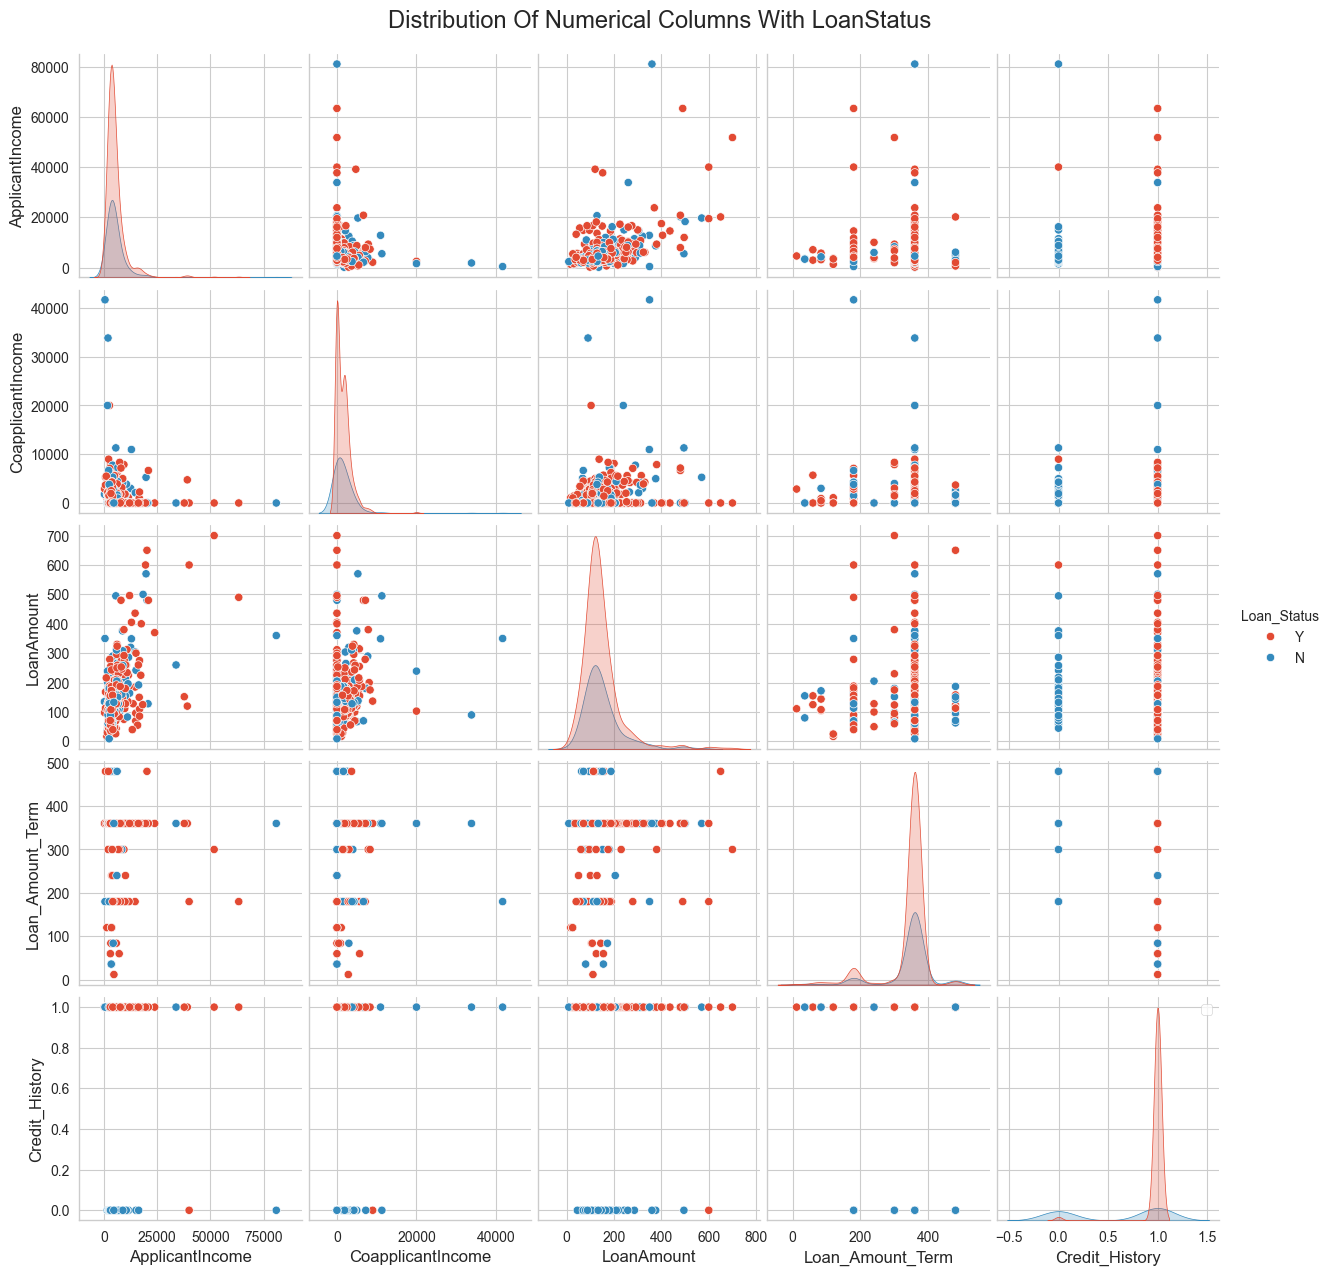

In [117]:
sns.pairplot(df, hue = "Loan_Status")
plt.suptitle("Distribution Of Numerical Columns With LoanStatus", size = 17, y=1.02)
plt.show()

In [30]:
df1 = df.copy()

## Data Preparation and Training Loan Approval Prediction Model

**In this step, we will:**

1) convert categorical columns into numerical ones;
2) split the data into training and test sets;
3) scale the numerical features;
4) train the loan approval prediction model.

In [31]:
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.model_selection import train_test_split

In [32]:
# Convert categorical columns to numerical using label encoding

le = LabelEncoder()

df1 = df1.apply( lambda col: le.fit_transform(col) if col.dtype == "object" else col)

In [33]:
corr = df1.corr()
corr["Loan_Status"].sort_values(ascending = False)

Loan_Status          1.000000
Credit_History       0.560916
Married              0.084109
CoapplicantIncome    0.058402
Gender               0.041203
Property_Area        0.037110
Dependents           0.020233
ApplicantIncome      0.003490
Self_Employed       -0.004677
Loan_Amount_Term    -0.026135
LoanAmount          -0.027633
Education           -0.109865
Name: Loan_Status, dtype: float64

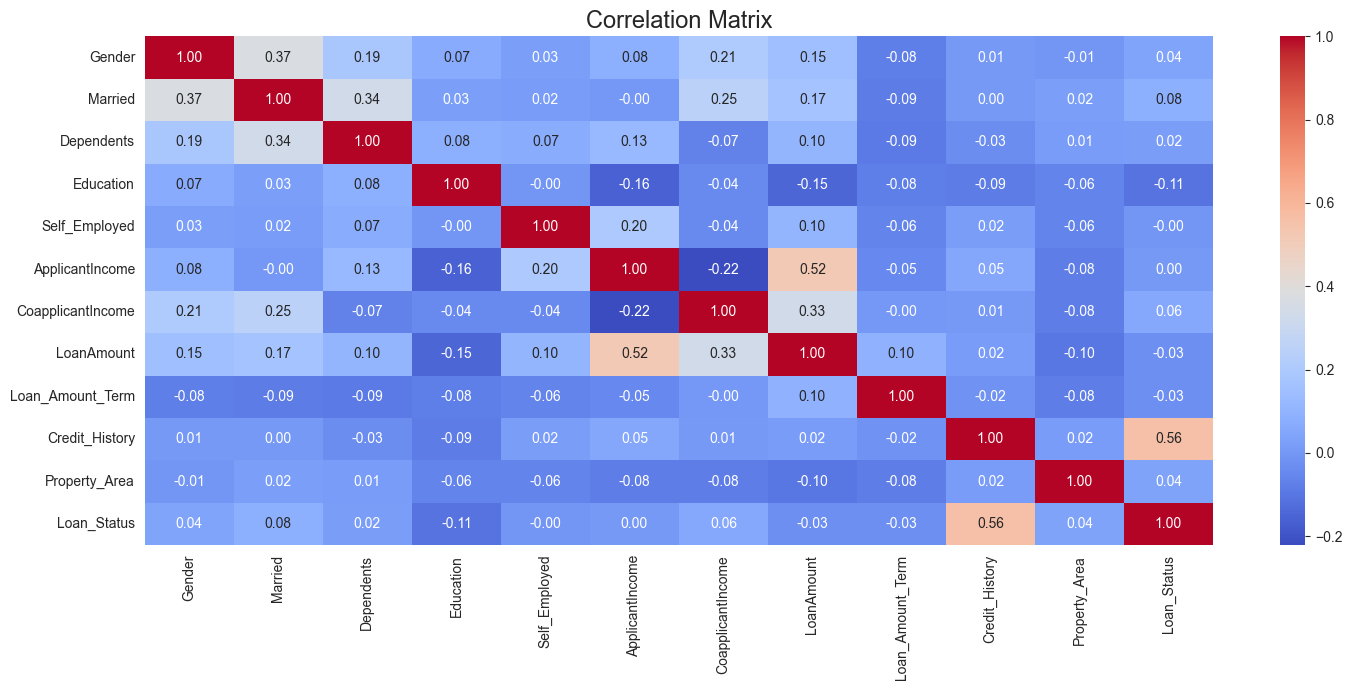

In [34]:
plt.figure( figsize = (15,7))

sns.heatmap(corr, annot = True , fmt = "1.2f", cmap = "coolwarm")

plt.title("Correlation Matrix", size = 17 )
plt.tight_layout()
plt.show()

In [35]:
x = df1.drop( columns = "Loan_Status", axis = 1)
y = df1["Loan_Status"]

In [36]:
y.value_counts()

Loan_Status
1    380
0    168
Name: count, dtype: int64

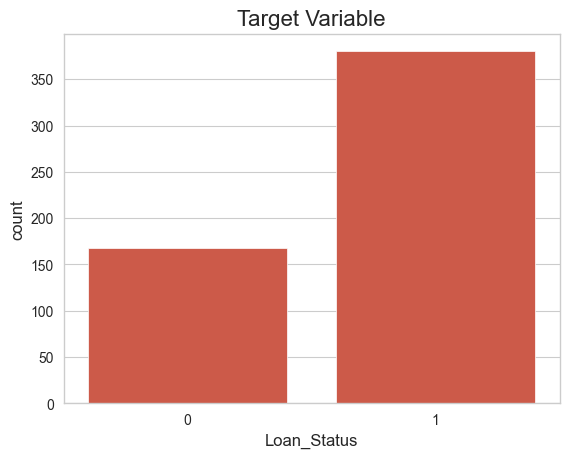

In [37]:
sns.barplot(x = y.value_counts().keys(), y = y.value_counts())

plt.title("Target Variable", size = 16)
plt.show()

As we can see in the above figure that the class is imbalanced in target variable , which leads to model overfitiing ,
so we will use SMOT method to balance the class

In [38]:
from imblearn.over_sampling import SMOTE

In [39]:
x, y = SMOTE().fit_resample(x, y)

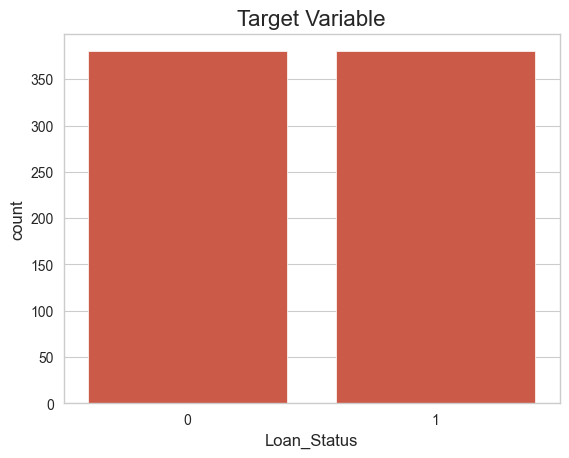

In [40]:
sns.barplot(x = y.value_counts().keys(), y = y.value_counts())

plt.title("Target Variable", size = 16)
plt.show()

so we can see that the class is balanced now 

In [41]:
# Spliting the data into training and testing 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify = y)

In [42]:
# Scale the numerical columns using StandardScaler

scaler = StandardScaler()

numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

x_train[numerical_cols] = scaler.fit_transform(x_train[numerical_cols])
x_test[numerical_cols] = scaler.transform(x_test[numerical_cols])

## Random Forest Classifier

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
from sklearn.model_selection import GridSearchCV

In [44]:
params = { 
                'n_estimators': [100, 200], 
                'max_depth': [None, 10, 20, 30], 
                'min_samples_split': [2, 5, 10], 
                'min_samples_leaf': [1, 2, 4], 
                'bootstrap': [True, False], 
                'criterion': ["gini", "entropy"]
            }

rf = GridSearchCV( RandomForestClassifier( random_state=42 ) , 
                   param_grid = params ,
                   cv = 3 ,
                   n_jobs = -1 ,
                   scoring = "accuracy"
                  )

rf.fit(x_train , y_train)

rf_best = rf.best_estimator_


In [45]:
rf_test_pred = rf_best.predict(x_test)

In [46]:
print(f'\n           Classificatin Report Of Test Data Prediciton\n')
print(classification_report( y_test , rf_test_pred))


           Classificatin Report Of Test Data Prediciton

              precision    recall  f1-score   support

           0       0.90      0.82      0.86        76
           1       0.83      0.91      0.87        76

    accuracy                           0.86       152
   macro avg       0.86      0.86      0.86       152
weighted avg       0.86      0.86      0.86       152



In [47]:
print(f'Confusion Matrix Of Test Data \n')
print(confusion_matrix( y_test , rf_test_pred))

Confusion Matrix Of Test Data 

[[62 14]
 [ 7 69]]


In [48]:
print(f'Test Accuracy')
rf_acc = accuracy_score(y_test , rf_test_pred)
rf_acc*100

Test Accuracy


86.18421052631578

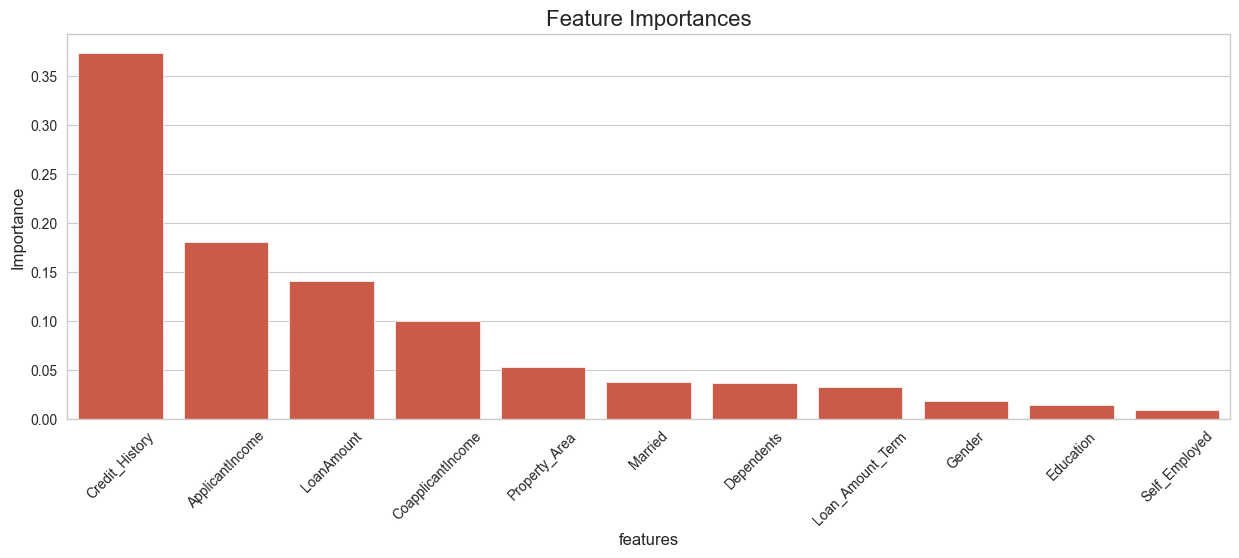

In [49]:
feature_importance = pd.DataFrame( {"features": x_train.columns , "Importance" :rf_best.feature_importances_})
feature_importance = feature_importance.sort_values( by = "Importance", ascending = False)
plt.figure( figsize = (15,5))
sns.barplot( data = feature_importance, x = "features", y = "Importance")
plt.title("Feature Importances", size = 16)
plt.xticks(rotation = 45)
plt.show()

## Support Vector Classifier

In [50]:
from sklearn.svm import SVC

In [51]:
params =    { 
              'C': [0.1, 1, 10, 100], 
              'gamma': [1, 0.1, 0.01, 0.001], 
              'kernel': ['linear', 'rbf', 'poly', 'sigmoid'] 
             }

svc = GridSearchCV(
                    SVC( random_state =42 ),
                    param_grid = params,
                    cv= 5 ,
                    n_jobs = -1,
                    scoring = "accuracy"
                    )

svc.fit( x_train, y_train)

svc_best = svc.best_estimator_


In [52]:
svc_test_pred = svc_best.predict(x_test)

In [53]:
print(classification_report( y_test , svc_test_pred))

              precision    recall  f1-score   support

           0       0.76      0.70      0.73        76
           1       0.72      0.78      0.75        76

    accuracy                           0.74       152
   macro avg       0.74      0.74      0.74       152
weighted avg       0.74      0.74      0.74       152



In [54]:
print(confusion_matrix( y_test , svc_test_pred))

[[53 23]
 [17 59]]


In [55]:
svc_acc = accuracy_score(y_test , svc_test_pred)
svc_acc*100

73.68421052631578

## Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
params = { 
               'C': [0.01, 0.1, 1, 10, 100], 
               'penalty': ['l1', 'l2', 'elasticnet', 'none'], 
               'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'] 
         } 

lr = GridSearchCV(
                    LogisticRegression(max_iter=1000),
                    param_grid=params, 
                    cv=5, 
                    n_jobs=-1,
                    scoring = "accuracy"
                )

lr.fit(x_train, y_train)

lr_best = lr.best_estimator_


In [58]:
lr_test_pred = lr_best.predict(x_test)

In [59]:
print(classification_report( y_test , lr_test_pred))

              precision    recall  f1-score   support

           0       0.82      0.71      0.76        76
           1       0.74      0.84      0.79        76

    accuracy                           0.78       152
   macro avg       0.78      0.78      0.78       152
weighted avg       0.78      0.78      0.78       152



In [60]:
print(confusion_matrix( y_test , lr_test_pred))

[[54 22]
 [12 64]]


In [61]:
lr_acc = accuracy_score(y_test , lr_test_pred)
lr_acc*100

77.63157894736842

## KNN Classifier

In [62]:
from sklearn.neighbors import KNeighborsClassifier

In [63]:
param = {
        'n_neighbors': [3, 5, 7, 9, 11],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan', 'minkowski']
        }


knn =  GridSearchCV(
                    estimator=KNeighborsClassifier(), 
                    param_grid=param,
                    cv=5, 
                    n_jobs=-1, 
                    scoring = "accuracy"
                    )

knn.fit(x_train, y_train)


knn_best = knn.best_estimator_


In [64]:
knn_test_pred = knn_best.predict(x_test)

In [65]:
print(classification_report( y_test , knn_test_pred))

              precision    recall  f1-score   support

           0       0.79      0.72      0.75        76
           1       0.74      0.80      0.77        76

    accuracy                           0.76       152
   macro avg       0.76      0.76      0.76       152
weighted avg       0.76      0.76      0.76       152



In [66]:
print(confusion_matrix( y_test , knn_test_pred))

[[55 21]
 [15 61]]


In [67]:
knn_acc = accuracy_score(y_test , knn_test_pred)
knn_acc*100

76.31578947368422

## Decision Tree

In [68]:
from sklearn.tree import DecisionTreeClassifier

In [69]:

param = {
        'criterion': ['gini', 'entropy'],
        'splitter': ['best', 'random'],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
        }


dt = GridSearchCV(
                  estimator=DecisionTreeClassifier(random_state=42), 
                  param_grid=param, 
                  cv=5,
                  n_jobs=-1, 
                 scoring = "accuracy"
                 )

dt.fit(x_train, y_train)


dt_best = dt.best_estimator_


In [70]:
dt_test_pred = dt_best.predict(x_test)

In [71]:
print(classification_report( y_test , dt_test_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83        76
           1       0.85      0.80      0.82        76

    accuracy                           0.83       152
   macro avg       0.83      0.83      0.83       152
weighted avg       0.83      0.83      0.83       152



In [72]:
print(confusion_matrix( y_test , dt_test_pred))

[[65 11]
 [15 61]]


In [73]:
dt_acc = accuracy_score(y_test , dt_test_pred)
dt_acc*100

82.89473684210526

## XGB Classifier

In [74]:
from xgboost import XGBClassifier

In [75]:
param = {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 6, 9],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'gamma': [0, 0.1, 0.2]
        }


xgb = GridSearchCV(
                   estimator=XGBClassifier(random_state=42), 
                   param_grid=param, 
                   cv=5, 
                   n_jobs=-1, 
                   scoring = "accuracy"
                 )

xgb.fit(x_train, y_train)

xgb_best = xgb.best_estimator_


In [76]:
xgb_test_pred = xgb_best.predict(x_test)

In [77]:
print(classification_report( y_test , xgb_test_pred))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86        76
           1       0.85      0.88      0.86        76

    accuracy                           0.86       152
   macro avg       0.86      0.86      0.86       152
weighted avg       0.86      0.86      0.86       152



In [78]:
print(confusion_matrix( y_test , xgb_test_pred))

[[64 12]
 [ 9 67]]


In [79]:
xgb_acc = accuracy_score(y_test , xgb_test_pred)
xgb_acc*100

86.18421052631578

## Model Comparision

In [80]:
comparision = pd.DataFrame(
                            {"Model":["LogisticRegression", "DecisionTree", "KNN", "SVC", "RandomForest", "XGB"],
                             "Accuracy":[lr_acc*100, dt_acc*100, knn_acc*100, svc_acc*100, rf_acc*100, xgb_acc*100]}
                          )

comparision.sort_values(by = "Accuracy", ascending = False)

,Model,Accuracy
4,RandomForest,86.184211
5,XGB,86.184211
1,DecisionTree,82.894737
0,LogisticRegression,77.631579
2,KNN,76.315789
3,SVC,73.684211


In [81]:
import pickle 

In [84]:
with open("xgboost_best.pkl","wb") as file:
    pickle.dump(xgb_best, file)

In [85]:
import pandas as pd
import sklearn
import xgboost
import numpy as np

print("pandas version:", pd.__version__)
print("scikit-learn version:", sklearn.__version__)
print("xgboost version:", xgboost.__version__)
print("numpy version:", np.__version__)

pandas version: 2.1.4
scikit-learn version: 1.2.2
xgboost version: 1.6.2
numpy version: 1.26.4
